In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#load dataset
df = pd.read_csv('insurance.csv')
df_two = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
#check for missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [36]:
#male = 1. female = 0
sex = {'male': 1,'female': 0}
df.sex = [sex[item] for item in df.sex]
#smoker yes = 1, no = 0
smoker = {'yes': 1, 'no': 0}
df.smoker = [smoker[item] for item in df.smoker]
#southeast = 0, southwest = 1, northwest = 2, northeast = 3
region = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}
df.region = [region[item] for item in df.region]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [37]:
#split up dataset
x = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df[['charges']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)

In [38]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

In [39]:
#Train and Test score
print('Train score:')
print(lm.score(x_train, y_train))
print('Test score:')
print(lm.score(x_test, y_test))

Train score:
0.748889170326672
Test score:
0.7571879570066847


In [51]:
#Coefficients and intercept
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)

Coefficients: [[  263.88624151  -237.71492412   349.01956259   462.48194749
  23574.14095002   337.66306405]]
Intercept: [-13544.53530534]


In [42]:
#correlation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


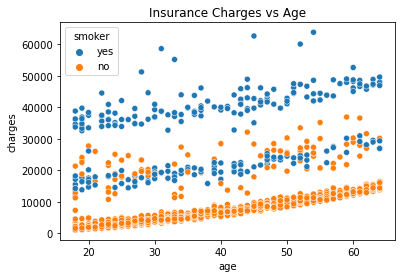

In [66]:
sns.scatterplot(data=df_two, x='age', y='charges', hue='smoker')
plt.title("Insurance Charges vs Age")
plt.show()

In [59]:
#OLS Regression Results
x = sm.add_constant(x)
olsmod = sm.OLS(df['charges'], x).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:42:08   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.312e+04   1045.495    -12.545      0.0

In [60]:
#R2 score
print('R2 score:', olsmod.rsquared)

R2 score: 0.7508283519755357


In [61]:
#ANOVA F test
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 668.4498714057272
Probability of observing value at least as high as F-statistic: 0.0


In [62]:
#p-values
print(olsmod.pvalues)

const       3.339864e-34
age         6.920274e-89
sex         6.934663e-01
bmi         1.388919e-31
children    6.015586e-04
smoker      0.000000e+00
region      1.521160e-02
dtype: float64


In [63]:
#Add predicted charges and residual to df
df['charges_predict'] = olsmod.predict(x)
df['residual'] = olsmod.resid
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_predict,residual
0,19,female,27.900,0,yes,southwest,16884.92400,25496.991252,-8612.067252
1,18,male,33.770,1,no,southeast,1725.55230,3350.062141,-1624.509841
2,28,male,33.000,3,no,southeast,4449.46200,6601.363365,-2151.901365
3,33,male,22.705,0,no,northwest,21984.47061,3698.003420,18286.467190
4,32,male,28.880,0,no,northwest,3866.85520,5544.707716,-1677.852516


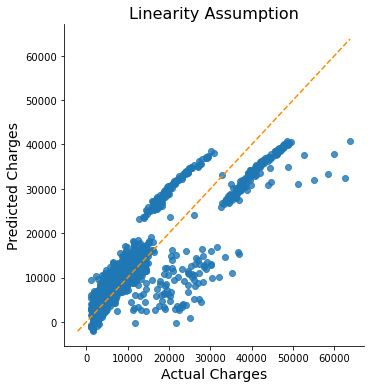

In [70]:
# Plotting the observed vs predicted values
sns.lmplot(x='charges', y='charges_predict', data=df, fit_reg=False, height=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['charges', 'charges_predict']].min().min()-10, 
                        df[['charges', 'charges_predict']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Charges', fontsize=14)
plt.xlabel('Actual Charges', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.0


C:\Users\Michael\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


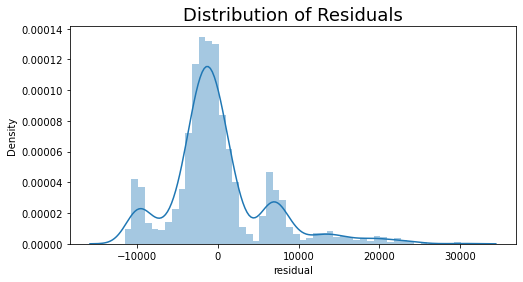

Residuals are not normally distributed


In [75]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

<ipython-input-78-10eea381c5ff>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


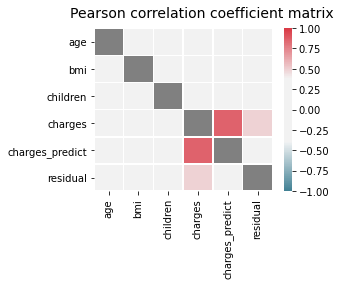

In [78]:
corr = df.corr()

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

In [79]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 2.0879295313235184
Little to no autocorrelation 

Assumption satisfied


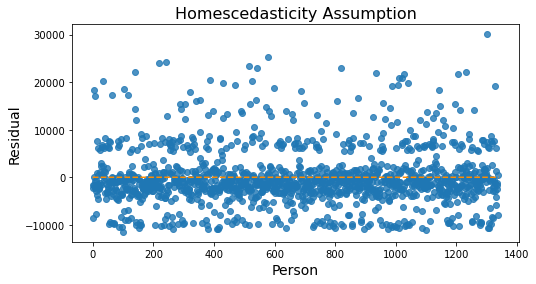

In [82]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Person', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  